# Fitting a Line Using MCMC
By Griffin Hosseinzadeh (2019 April 17)  
Updated by Charlotte Mason (2020 August 28)  
Updated by Griffin Hosseinzadeh (2025 April 30)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import emcee
import corner

## Generate Some Fake Data
Choose a slope $m$, intercept $b$, and scatter $\sigma$, and generate $N$ random points using the `np.random` module. Plot the results to see what your data look like. Our goal is to recover the parameters defined here. (Hint: this section is identical to the previous notebook.)

<ErrorbarContainer object of 3 artists>

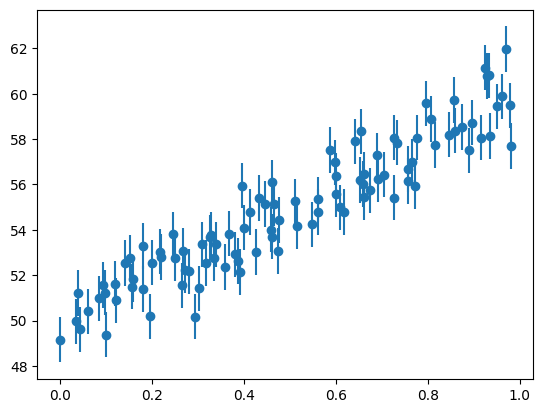

In [3]:
N = 100  # number of points
m = 10.  # slope
b = 50.  # intercept
sigma = 1.  # scatter

rng = np.random.default_rng()
x =  rng.random(size=N)
noise = rng.normal(loc=0.0, scale=1.0, size=N)
y =  ((m*x) +b ) + noise
dy =  np.full(N,sigma)# array of error bars for all the data (all `sigma`)

plt.errorbar(x,y,yerr=dy, fmt='o')

## Write Down the Posterior
Define functions that return the prior, the likelihood, and the posterior given a parameter vector `theta = [m, b]`. For computational accuracy (and convenience), we actually want to do this in log space. You can either use `np.log` (natural log) or `np.log10` (base-10 log). Regardless of the shape of your prior, it's good practice to limit the values of $m$ and $b$ to some reasonable range. (Hint: this section is identical to the previous notebook.)

In [4]:
lm_min = float(np.log(0))
lm_max = float(np.log(100))
lb_min = float(np.log(0))
lb_max = float(np.log(100))


m_min = 0
m_max = 100
b_min = 0
b_max = 100

def log_prior(theta):
    """
    Returns log(prior) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    
    Returns
    -------
    ln_prior: float
        Natural log of the prior probability function
    """
    m = theta[0]
    b = theta[1]
    
    if (m_min < m < m_max) and (b_min < b < b_max):
        return 0  # log(1) = 0
    return -np.inf  # log(0) = -infinity


def log_likelihood(theta, x, y, dy):
    """complete"""
    #Setting variables to be used in function
    length = len(x)
    slope=theta[0]
    intercept=theta[1]
    L=0
    #Generating model data from input parameters
    noise = rng.normal(loc=0.0, scale=1.0, size=length)
    y_model = ((slope*x) +intercept ) + noise
    #calculating log likelyhood
    for i in range(length):
        L=L+ ( (np.log(np.pi *2*(dy[i]**2))) + (((y[i] - y_model[i])/ dy[i])**2))
    L= -0.5*L
    
        
        
    return L# complete



def log_posterior(theta, x, y, dy):
    lp = log_prior(theta)
    
    return lp + log_likelihood(theta, x, y, dy)

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_8760\776157776.py:1: RuntimeWarning: divide by zero encountered in log
  lm_min = float(np.log(0))
C:\Users\Ishaan\AppData\Local\Temp\ipykernel_8760\776157776.py:3: RuntimeWarning: divide by zero encountered in log
  lb_min = float(np.log(0))


## Set Up the Ensemble Sampler
This time we will use the `emcee` package that you imported above to sample the posterior probability distribution. Everything you need is contained within the `emcee.EnsembleSampler` class. Initialize this with 100 walkers and the `log_posterior` function you defined above. Don't forget that `log_posterior` takes additional arguments `x`, `y`, and `dy`. (Hint: check the documentation for `EnsembleSampler` for how to deal with this.)

Note, we will initialise the sampler in #1.5

In [5]:
n_walkers = 100
n_params  = 2  
args = (x, y, dy)

sampler = emcee.EnsembleSampler(
    n_walkers,
    n_params,
    log_posterior,
    args=args
)

## Setup random initial guesses for the starting positions

You'll need to give initial guesses for each walker, which you can draw randomly from the prior. 

In [6]:
m_random = rng.uniform(m_min, m_max, size=n_walkers)
b_random = rng.uniform(b_min, b_max, size=n_walkers)
initial_guesses = np.column_stack([m_random, b_random]) #woah this function would've been helpgul for the gri

## Initialize and run!

Initialize the `EnsembleSampler` object and then run it with the `run_mcmc` method. For now, 10000 steps is more than enough, and should run in less than a minute on your laptop. If this command takes too long, ask for help.

In [7]:
# initialize the sampler
sampler = emcee.EnsembleSampler(
    n_walkers,             
    n_params,              
    log_posterior,         
    args=args              # extra args: (x, y, dy)
)


# run!
n_steps = 10000
sampler.run_mcmc( initial_guesses,n_steps)

State([[ 9.65597589 49.83474677]
 [10.29050358 49.97078494]
 [ 9.43467948 50.46016412]
 [10.42534542 49.57856927]
 [10.71855194 49.72899606]
 [10.44212721 49.47393703]
 [10.15396087 49.81858345]
 [11.178027   49.39003795]
 [10.73001023 49.4286648 ]
 [10.14533194 49.95975957]
 [10.31711003 49.7383629 ]
 [10.2499514  49.8685271 ]
 [11.04417405 49.2982048 ]
 [ 8.59251537 50.88531454]
 [10.60675318 49.70446217]
 [ 9.02492342 50.40352528]
 [ 9.87006063 50.0485885 ]
 [ 9.42630185 49.97430742]
 [ 9.67798351 49.90323347]
 [10.61910191 49.90377785]
 [10.12395287 49.83197845]
 [10.09889964 50.09583825]
 [11.14467639 49.06118216]
 [10.64978964 49.56576496]
 [ 9.71346875 49.91203974]
 [10.68071365 49.80305897]
 [ 9.86279303 49.93531024]
 [10.06602259 49.75475388]
 [10.24333588 49.86984436]
 [10.30187624 49.69205643]
 [11.21529179 49.37257678]
 [ 9.63452159 50.15094826]
 [10.62434962 49.6788822 ]
 [10.76427407 49.4992924 ]
 [10.79592786 49.24902941]
 [11.14412978 49.34865123]
 [10.31579357 49.89847

## Plot the Results
First make a plot of the walker positions (value of each parameter) at each step. Write a function to do this, since you'll be using it a lot.

(100, 10000, 2)


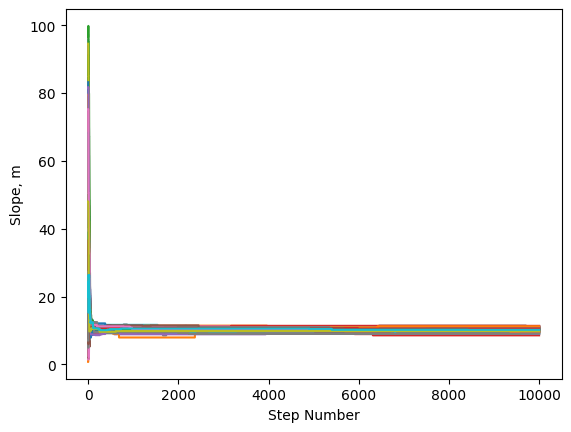

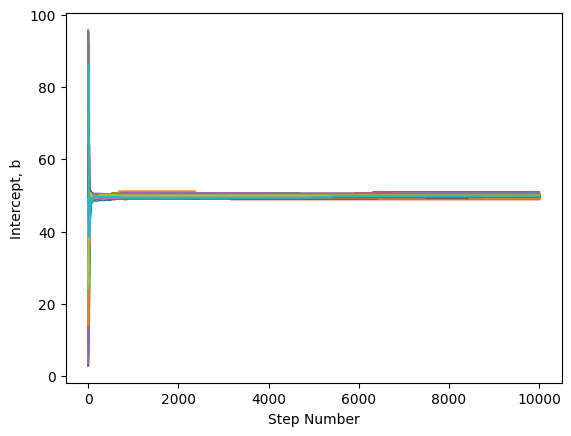

In [9]:
print(sampler.chain.shape)  # check that this has dimensions (n_walkers, n_steps, n_params)

def chain_plots(chain, **kwargs):
    """
    Plot the histories for each walker in sampler.chain
    
    Parameters
    ----------
    chain: ndarray
        3D array given by sampler.flatchain, with shape (n_walkers, n_steps, n_params)
    kwargs: `.Line2D` properties, optional
        All keyword arguments are passed to `pyplot.plot`
    """
    
    plt.figure()
    for i in range(chain.shape[0]):
        plt.plot(chain[i, :, 0], **kwargs)
    plt.xlabel('Step Number')
    plt.ylabel('Slope, m')

    plt.figure()
    for i in range(chain.shape[0]):
        plt.plot(chain[i, :, 1], **kwargs)
    plt.xlabel('Step Number')
    plt.ylabel('Intercept, b')
    
chain_plots(sampler.chain)

Each one of those colored lines is a walker. They started out at your initial guesses. What do you immediately notice?

Try making more useful plots by zooming in on the relevant parts. Hint: you can adjust line opacity in matplotlib with the `alpha` parameter.

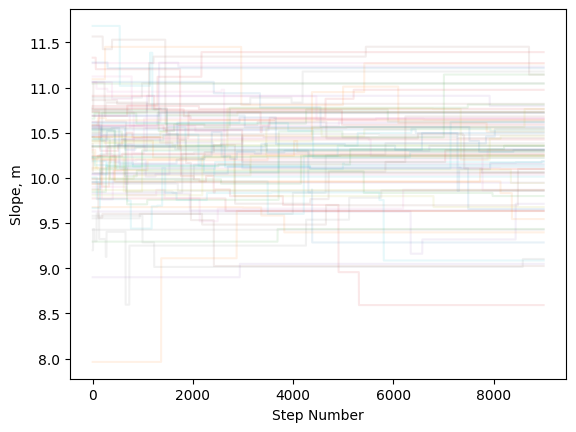

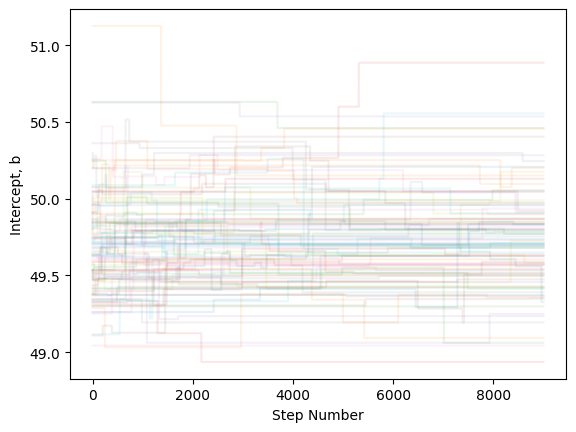

In [17]:
n_burn = 1000
chain_plots(sampler.chain[:, n_burn:, :], alpha=0.1)

Are your chains converged? How many steps did it take for this to happen? This is called the "burn-in" period. **From now on, only use the steps after the burn-in period.**

Now make a scatter plot of the two parameters, one point for each walker-step. Hint: `sampler.flatchain`.

test

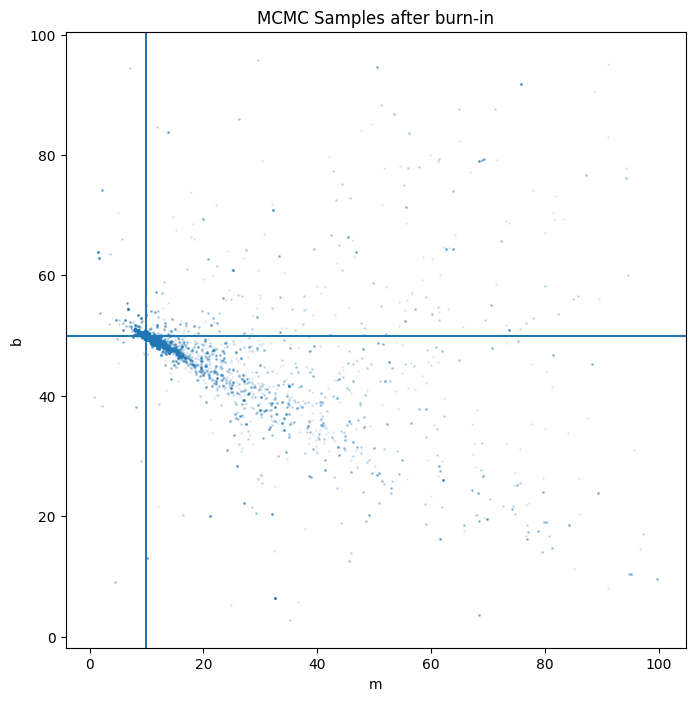

In [22]:
n_burn = 1000

# Get samples after burn-in
samples = sampler.flatchain 

# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1, s=1)
plt.xlabel('m')
plt.ylabel('b')
plt.axvline(m)  # True value of m
plt.axhline(b)  # True value of b
plt.title('MCMC Samples after burn-in')
plt.show()


How does this compare to the distribution you had in the previous notebook (assuming you used the same parameters)?

Now let's marginalize over each parameter. Given that we have walkers that are distributed according to the 2D posterior, think about how to calculate the marginalized posterior for each parameter.

Text(0, 0.5, 'Probability Density')

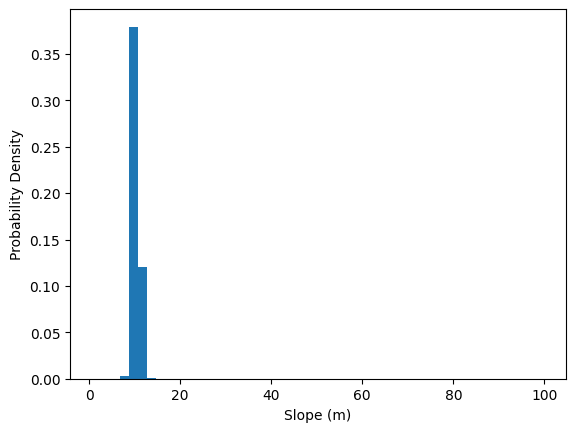

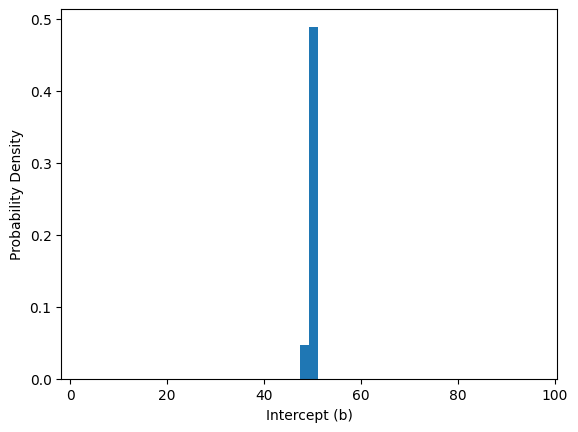

In [24]:
plt.figure()
plt.hist(samples[:, 0], bins=50, density=True)
plt.xlabel('Slope (m)')
plt.ylabel('Probability Density')

plt.figure()
plt.hist(samples[:, 1], bins=50, density=True)
plt.xlabel('Intercept (b)')
plt.ylabel('Probability Density')

This looks almost exactly like the plots in my previous notebook!

Calculate the medians and the 68% ($1\sigma$) confidence intervals for each parameter. Check your answers against the centers and widths of the distributions you just plotted above. Do they look about right?

In [31]:
# Calculating the medians and the values i need for tghe 68% confidence intervals
m_mcmc = np.percentile(samples[:, 0], [16, 50, 84])
b_mcmc = np.percentile(samples[:, 1], [16, 50, 84])


m_med = m_mcmc[1]
dm_lo = m_mcmc[0] - m_mcmc[1]  
dm_hi = m_mcmc[2] - m_mcmc[1]  


print(f'$m = {m_med:.2f}_{{{dm_lo:+.2f}}}^{{{dm_hi:+.2f}}}$')

b_med = b_mcmc[1]
db_lo = b_mcmc[0] - b_mcmc[1]  
db_hi = b_mcmc[2] - b_mcmc[1] 
print(f'$b = {b_med:.2f}_{{{db_lo:+.2f}}}^{{{db_hi:+.2f}}}$') # I dont understand this formatting style



$m = 10.32_{-0.49}^{+0.45}$
$b = 49.71_{-0.29}^{+0.34}$


There's an easy way to generate all these plots and summary statistics: `corner.corner`! Produce a corner plot with the true parameters labeled and the best-fit values (with error bars) printed on the plot. How close did we get to the parameters we used to generate the data?

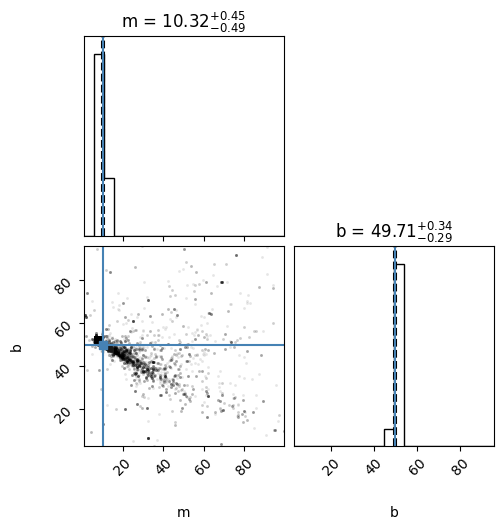

In [30]:
fig = corner.corner(samples, 
                   labels=["m", "b"],
                   truths=[m, b],  # True parameter values
                   quantiles=[0.16, 0.5, 0.84],
                   show_titles=True
)

## Take-Away Message
MCMC is a much more efficient way to sample the probability distribution because the walkers mostly stay in the highest-probability region. Plus it essentially gives you the marginalized posteriors for free, because the density of walkers matches the probability density.

## Other Things to Try
- Add a parameter for the intrinsic scatter and redo the MCMC fit.
- Try implementing Metropolis-Hastings algorithm yourself and see if you can get the same results as `emcee`.